# Lab 4

Brock Forsythe and Michaela Cohee

In [88]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [89]:
adults = pd.read_csv('adult.data',header=None, skipinitialspace=True,
    names = ['age', 'workclass', 'fnlwgt', 'education','education-num', 'marital-status',
            'occupation','relationship','race','sex','capital-gain','capital-loss',
            'hours-per-week','native-country','income']
)

adults

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


### What are the 25th, 50th, and 75th pecentiles of the “education-num” field?

In [90]:
educ_info = adults[['education-num']]

print("The 25th percentile of the 'education_num' field is ", np.percentile(educ_info, 25))
print("The 50th percentile of the 'education_num' field is ", np.percentile(educ_info, 50))
print("The 75th percentile of the 'education_num' field is ", np.percentile(educ_info, 75))

The 25th percentile of the 'education_num' field is  9.0
The 50th percentile of the 'education_num' field is  10.0
The 75th percentile of the 'education_num' field is  12.0


In [91]:
educ_info.describe()

# this calculates the 25th, 50th, and 75th percentile of education-num easily. Now we can check our work


,education-num
count,32561.000000
mean,10.080679
std,2.572720
min,1.000000
25%,9.000000
50%,10.000000
75%,12.000000
max,16.000000


### What is the probability that an adult makes more than 50k given that their education-num is within the ranges defined by the above quantiles (from 0 to the 25th percentile, from the 25th to the 50th etc)?

In [92]:
educ_income = adults[['education-num', 'income']]

#quartile_one=(educ_income[(educ_income['income'] == '>50K') & (educ_income['education-num'] >= 1) & (educ_income['education-num'] <= 9)].groupby(by='education-num').count().sum() / educ_income[(educ_income['education-num'] >= 1) & (educ_income['education-num'] <= 9)].count().sum())
#quartile_two=(educ_income[(educ_income['income'] == '>50K') & (educ_income['education-num'] >= 9) & (educ_income['education-num'] <= 10)].groupby(by='education-num').count().sum() / educ_income[(educ_income['education-num'] >= 9) & (educ_income['education-num'] <= 10)].count().sum())
#quartile_three=(educ_income[(educ_income['income'] == '>50K') & (educ_income['education-num'] >= 10) & (educ_income['education-num'] <= 12)].groupby(by='education-num').count().sum() / educ_income[(educ_income['education-num'] >= 10) & (educ_income['education-num'] <= 12)].count().sum())
##NOTE FOR BROCK: I HAVE NO CLUE HOW THE BELOW STUFF IS WORKING WITH THE ABOVE STUFF COMMENTED OUT

print("P(>50K | education-num in quartile 1) = ", quartile_one)
print("P(>50K | education-num in quartile 2) = ", quartile_two)
print("P(>50K | education-num in quartile 3) = ", quartile_three)

P(>50K | education-num in quartile 1) =  income    0.065033
dtype: float64
P(>50K | education-num in quartile 2) =  income    0.08605
dtype: float64
P(>50K | education-num in quartile 3) =  income    0.103337
dtype: float64


### Plot the change in probability that a person makes more and less than 50k given their years of education.

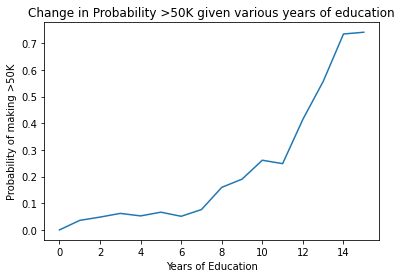

In [96]:
rich = educ_income[educ_income['income'] == '>50K']

plot_intersection = rich.groupby(by='education-num').count()

educ = educ_income.groupby(by='education-num').count()

plot_intersection = plot_intersection.reset_index()

educ = educ.reset_index()

top = [i[1]['income'] for i in plot_intersection.iterrows()]
bottom = [i[1]['income'] for i in educ.iterrows()]

top.insert(0,0)

y_values = [i / j for i,j in zip(top, bottom)]
x_values = [i for i in range(0, 16)]

plt.plot(x_values, y_values)
plt.title('Change in Probability >50K given various years of education')
plt.xlabel('Years of Education')
plt.ylabel('Probability of making >50K')
plt.show()

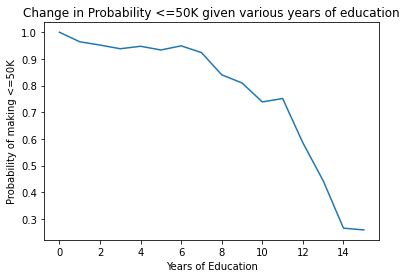

In [97]:
poor = educ_income[educ_income['income'] == '<=50K']

plot_intersection = poor.groupby(by='education-num').count()

educ = educ_income.groupby(by='education-num').count()

plot_intersection = plot_intersection.reset_index()

educ = educ.reset_index()

top = [i[1]['income'] for i in plot_intersection.iterrows()]
bottom = [i[1]['income'] for i in ed_data.iterrows()]

y_values = [i / j for i,j in zip(top, bottom)]
x_values = [i for i in range(0, 16)]

plt.plot(x_values, y_values)
plt.title('Change in Probability <=50K given various years of education')
plt.xlabel('Years of Education')
plt.ylabel('Probability of making <=50K')
plt.show()

### What is the covariance between the number of hours worked per week and education-num?

In [95]:
hours_educNum = adults[['education-num', 'hours-per-week']]
#matrix = hours_educNum.values
#xvals = [i for i,j in matrix]
#yvals = [j for i,j in matrix]
#cov = np.cov(xvals, yvals, rowvar=False)
cov[0,1] ##not sure. 

4.705337944611542